In [1]:
from itertools import chain, combinations


transactions = [
    {'Milk', 'Bread', 'Butter'},
    {'Bread', 'Butter'},
    {'Milk', 'Bread', 'Sugar'},
    {'Milk', 'Sugar'},
    {'Milk', 'Bread', 'Butter', 'Sugar'},
    {'Bread', 'Sugar'},
    {'Milk', 'Bread'}
]


def get_all_itemsets(transactions):
    items = sorted(set(chain(*transactions)))  
    itemsets = []
    for k in range(1, len(items) + 1):
        itemsets.extend(combinations(items, k))
    return itemsets


def calculate_support(itemsets, transactions):
    support_count = {}
    for itemset in itemsets:
        support_count[itemset] = sum(1 for transaction in transactions if set(itemset).issubset(transaction))
    return support_count


itemsets = get_all_itemsets(transactions)


support_count = calculate_support(itemsets, transactions)
print("Support for each itemset:")
for itemset, count in support_count.items():
    print(f"{itemset}: {count / len(transactions)}")


Support for each itemset:
('Bread',): 0.8571428571428571
('Butter',): 0.42857142857142855
('Milk',): 0.7142857142857143
('Sugar',): 0.5714285714285714
('Bread', 'Butter'): 0.42857142857142855
('Bread', 'Milk'): 0.5714285714285714
('Bread', 'Sugar'): 0.42857142857142855
('Butter', 'Milk'): 0.2857142857142857
('Butter', 'Sugar'): 0.14285714285714285
('Milk', 'Sugar'): 0.42857142857142855
('Bread', 'Butter', 'Milk'): 0.2857142857142857
('Bread', 'Butter', 'Sugar'): 0.14285714285714285
('Bread', 'Milk', 'Sugar'): 0.2857142857142857
('Butter', 'Milk', 'Sugar'): 0.14285714285714285
('Bread', 'Butter', 'Milk', 'Sugar'): 0.14285714285714285


In [2]:

min_support = 0.3  


frequent_itemsets = {itemset: support for itemset, support in support_count.items() if support / len(transactions) >= min_support}
print("\nFrequent itemsets:")
for itemset, support in frequent_itemsets.items():
    print(f"{itemset}: {support / len(transactions)}")



Frequent itemsets:
('Bread',): 0.8571428571428571
('Butter',): 0.42857142857142855
('Milk',): 0.7142857142857143
('Sugar',): 0.5714285714285714
('Bread', 'Butter'): 0.42857142857142855
('Bread', 'Milk'): 0.5714285714285714
('Bread', 'Sugar'): 0.42857142857142855
('Milk', 'Sugar'): 0.42857142857142855


In [3]:

def calculate_confidence(frequent_itemsets):
    rules_confidence = {}
    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            for consequent in combinations(itemset, 1): 
                antecedent = tuple(set(itemset) - set(consequent))
                antecedent_support = support_count.get(antecedent, 0)
                if antecedent_support > 0:
                    confidence = frequent_itemsets[itemset] / antecedent_support
                    rules_confidence[(antecedent, consequent)] = confidence
    return rules_confidence


rules_confidence = calculate_confidence(frequent_itemsets)
print("\nAssociation Rules and their Confidence:")
for rule, confidence in rules_confidence.items():
    print(f"{rule[0]} -> {rule[1]}: {confidence}")



Association Rules and their Confidence:
('Butter',) -> ('Bread',): 1.0
('Bread',) -> ('Butter',): 0.5
('Milk',) -> ('Bread',): 0.8
('Bread',) -> ('Milk',): 0.6666666666666666
('Sugar',) -> ('Bread',): 0.75
('Bread',) -> ('Sugar',): 0.5
('Sugar',) -> ('Milk',): 0.75
('Milk',) -> ('Sugar',): 0.6


In [4]:

def calculate_lift(rules_confidence, support_count, transactions):
    rules_lift = {}
    for (antecedent, consequent), confidence in rules_confidence.items():
        consequent_support = support_count.get(consequent, 0) / len(transactions)
        if consequent_support > 0:
            lift = confidence / consequent_support
            rules_lift[(antecedent, consequent)] = lift
    return rules_lift


rules_lift = calculate_lift(rules_confidence, support_count, transactions)
print("\nAssociation Rules and their Lift:")
for rule, lift in rules_lift.items():
    print(f"{rule[0]} -> {rule[1]}: {lift}")



Association Rules and their Lift:
('Butter',) -> ('Bread',): 1.1666666666666667
('Bread',) -> ('Butter',): 1.1666666666666667
('Milk',) -> ('Bread',): 0.9333333333333335
('Bread',) -> ('Milk',): 0.9333333333333332
('Sugar',) -> ('Bread',): 0.875
('Bread',) -> ('Sugar',): 0.875
('Sugar',) -> ('Milk',): 1.05
('Milk',) -> ('Sugar',): 1.05


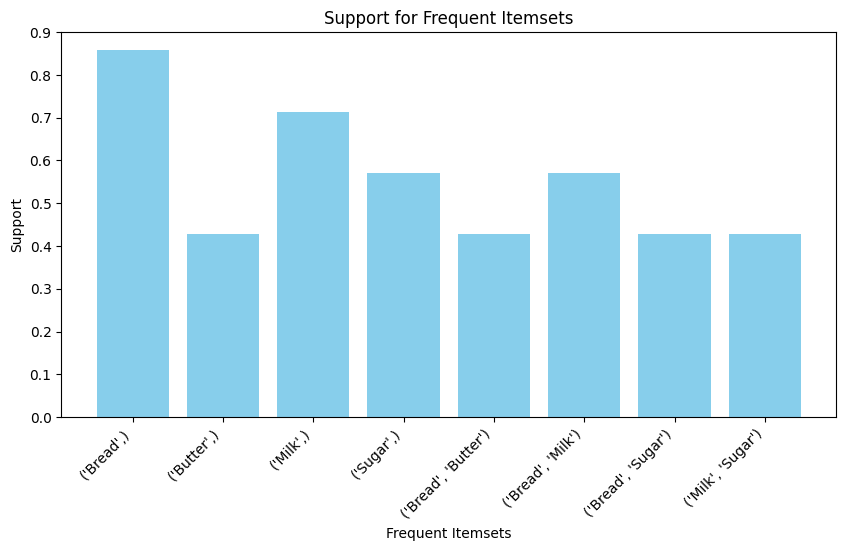

In [5]:
import matplotlib.pyplot as plt


itemsets, supports = zip(*[(str(itemset), support / len(transactions)) for itemset, support in frequent_itemsets.items()])

plt.figure(figsize=(10, 5))
plt.bar(itemsets, supports, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Frequent Itemsets")
plt.ylabel("Support")
plt.title("Support for Frequent Itemsets")
plt.show()
